# Firdaus Adi Nugroho - Unsupervised Learning (Automobile)

## Data Preparation

In [240]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [81]:
data = pd.read_csv('automobile-spec.csv')


In [82]:
data.tail()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [84]:
data.describe()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [103]:
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [111]:
# karena berisi kategorikal, maka diisi oleh modus
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode().values[0])
# numerikal diganti dengan mean
data['bore'] = data['bore'].fillna(data['bore'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mode().values[0])
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
data['price'] = data['price'].fillna(data['price'].mean())

In [112]:
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [260]:
data.head()

,index,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [236]:
data.shape

(205, 26)

# 1. K-Means

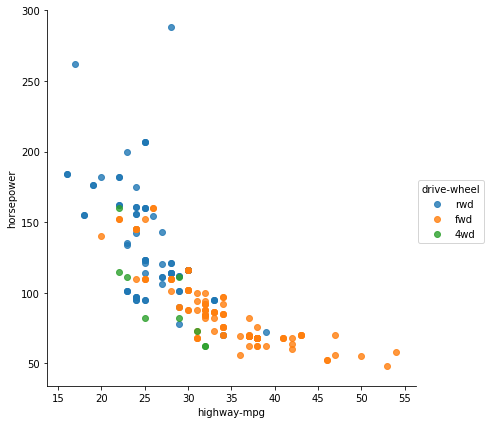

In [162]:
sns.lmplot(x='highway-mpg', y='horsepower',data=data, fit_reg= False, hue = 'drive-wheel', size = 6,aspect = 1)

In [216]:
# Step 3. Konversi Dataset ke Data Array 
X = data.iloc[:, [21,23]].values
y = data.iloc[:, [6]].values

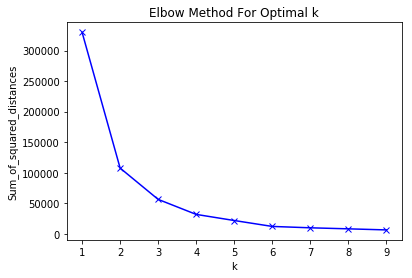

In [217]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [120]:
data = data.reset_index()

In [218]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

In [219]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[107.10666667  22.73333333]
 [ 71.85555556  30.74444444]
 [170.          17.45      ]]


In [220]:
print(kmeans.labels_)

[0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 2 1 1 1 1 1 0 1 1 1 0 1 2 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 2 2 2 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 2 2 2
 2 2 1 1 1 0 0 1 2 2 2 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 2 1 0 1 1 1 1 2 2 2 2 2 2 1 1 0 0 0 0 2 2 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 2 2 1 1 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 2 2 0 2 0 0 0]


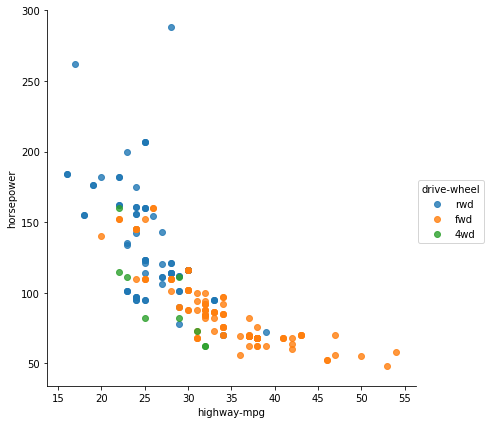

In [221]:
sns.lmplot(x='highway-mpg', y='horsepower',data=data, fit_reg= False, hue = 'drive-wheel', size = 6,aspect = 1)

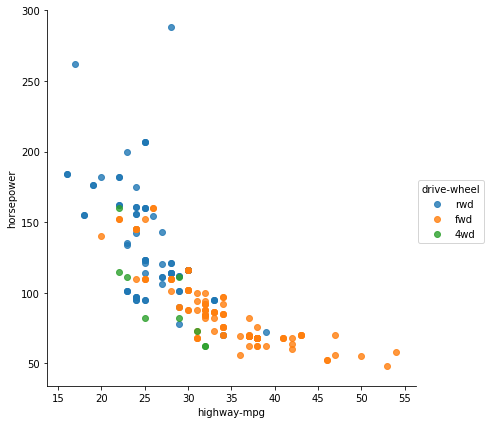

In [181]:
sns.lmplot(x='highway-mpg', y='horsepower',data=data, fit_reg= False, hue = 'drive-wheel', size = 6,aspect = 1)

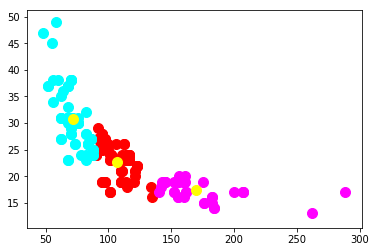

In [222]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='magenta', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.show()

In [223]:
# Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

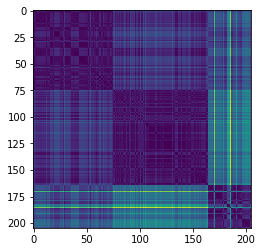

In [232]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [246]:
#test score K-Means

from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette_score(X, labels)

0.5887156895784117

# 2. Hiearchical Clustering

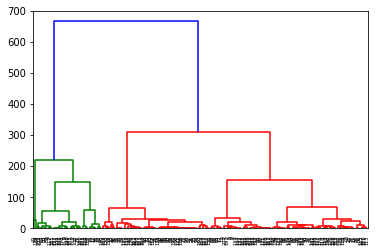

In [226]:
# Step 5. Membentuk dendogram dengan metode ward 
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [241]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [244]:
#test score Hiearchical Clustering

labels1 = model
silhouette_score(X, labels)

0.6688739050581288

# 3. DBSCAN

In [228]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [229]:
print(dir(data))

['ID', 'T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__

In [258]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps = 15)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [257]:
# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  0  1  0  0  0  0  0  1  1  0  0  0  0  0  2  2  2  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
  2 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  2  2  2  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  1  1  1 -1  1  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  1  1 -1 -1 -1 -1  0  0  0  0  0  0  1  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  0  1  1  0  0]


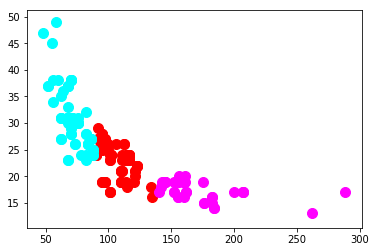

In [259]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='cyan', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='magenta', label='Cluster 3')
plt.show()

In [255]:
dbscan = DBSCAN(eps=0.5)
model = dbscan.fit_predict(X)
print(silhouette_score(X, labels))

0.5887156895784117


# Menjawab Pertanyaan

## 1. Pada case automobile ini, saya membuat 3 cluster berdasarkan dari K yang telah ditentukan dan ditentukan dari Elbow Method yang sudah dibuat
## 2. Algoritma yang akan diambil ialah algoritma Hierarical Clustering. Karena memiliki tingkat akurasi yang paling tinggi dibanding K-Means dan DBSCAN
## 3. Ciri-Ciri:
### K-Means: memiliki parameter K sebagai clusteringnya
### Hierarical Clustering: memiliki, model yang banyak dan parameter yang cukup banyak sehingga bisa divariasikan
### DBSCAN: memiliki karakteristik berupa menentukan epsilon sehingga jaraknya bisa ditentukan dan minimal point yang dapat ditentukan